# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
imdb_df = pd.read_csv("data/imdb_1000.csv")

In [4]:
# show first 5 rows of imdb_df
imdb_df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [5]:
# load bikes dataset as pandas dataframe
bikes_df = pd.read_csv("data/bikes.csv", sep=";", parse_dates=['Date'])

In [6]:
# show first 3 rows of bikes_df
bikes_df.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [7]:
# list columns of imdb_df
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [8]:
# what are the datatypes of values in columns
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [9]:
# list first 5 movie titles
imdb_df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [10]:
# show only movie title and genre
imdb_df[['title', 'genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [11]:
# show the type of duration column
a = imdb_df['duration']
print(type(a))

<class 'pandas.core.series.Series'>


In [12]:
# show duration values of movies as numpy arrays
imdb_df['duration'].values[:10]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139], dtype=int64)

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [13]:
# convert all the movie titles to uppercase
to_uppercase = lambda x: x.upper()
imdb_df['title'].apply(to_uppercase).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

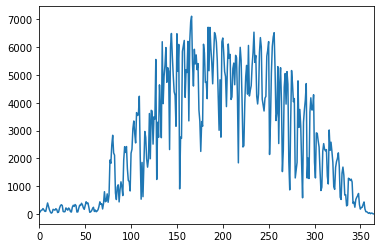

In [15]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt 

bikes_df['Berri1'].plot()
plt.show()

In [22]:
# plot all the columns of bikes_df
bikes_df.plot()


## Value counts

Get count of unique values in a particular column/Series.

In [23]:
# what are the unique genre in imdb_df?
imdb_df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

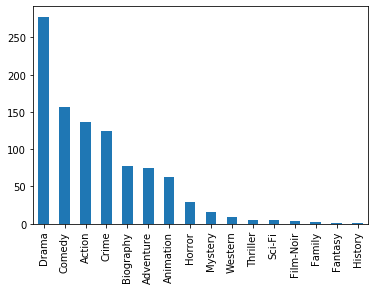

In [24]:
# plotting value counts of unique genres as a bar chart
imdb_df['genre'].value_counts().plot.bar()

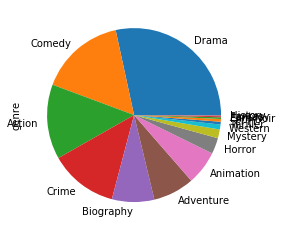

In [25]:
# plotting value counts of unique genres as a pie chart
imdb_df['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [26]:
# show index of bikes_df
bikes_df.head()


,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,00:00,95,197,330,124,6.0,97,13,2,16.0


In [27]:
# get row for date 2012-01-01
bikes_df.loc[bikes_df['Date']=='2012-01-01']

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [28]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[11]

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [29]:
# select only those movies where genre is adventure
imdb_df.loc[imdb_df['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [30]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
imdb_df.loc[(imdb_df['star_rating'] > 8) & (imdb_df['duration']>130)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
273,8.1,Papillon,R,Biography,151,"[u'Steve McQueen', u'Dustin Hoffman', u'Victor..."
288,8.1,Sling Blade,R,Drama,135,"[u'Billy Bob Thornton', u'Dwight Yoakam', u'J...."
289,8.1,All Quiet on the Western Front,UNRATED,Drama,136,"[u'Lew Ayres', u'Louis Wolheim', u'John Wray']"
290,8.1,Prisoners,R,Crime,153,"[u'Hugh Jackman', u'Jake Gyllenhaal', u'Viola ..."


## Adding a new column to DataFrame

In [31]:
# add a weekday column to bikes_df
import datetime as dt
bikes_df['weekday']=bikes_df.Date.dt.weekday_name
bikes_df

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0,Wednesday
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0,Thursday
3,2012-04-01,00:00,61,144,318,116,2.0,111,8,1,19.0,Sunday
4,2012-05-01,00:00,95,197,330,124,6.0,97,13,2,16.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,00:00,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting an existing column from DataFrame

In [32]:
# remove column 'Unnamed: 1' from bikes_df
bikes_df.drop('Unnamed: 1',axis=1,inplace=True)

## Deleting a row in DataFrame

In [33]:
# remove row no. 1 from bikes_df
bikes_df.drop(0,axis=0)

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
1,2012-02-01,43,83,153,68,11.0,53,6,1,21.0,Wednesday
2,2012-03-01,58,135,248,104,2.0,89,3,2,15.0,Thursday
3,2012-04-01,61,144,318,116,2.0,111,8,1,19.0,Sunday
4,2012-05-01,95,197,330,124,6.0,97,13,2,16.0,Tuesday
5,2012-06-01,75,146,244,98,4.0,86,4,0,17.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [37]:
# group imdb_df by movie genres
a=imdb_df.groupby('genre')
print(a.first())

           star_rating                                          title  \
genre                                                                   
Action             9.0                                The Dark Knight   
Adventure          8.9  The Lord of the Rings: The Return of the King   
Animation          8.6                                  Spirited Away   
Biography          8.9                               Schindler's List   
Comedy             8.6                              Life Is Beautiful   
Crime              9.3                       The Shawshank Redemption   
Drama              8.9                                   12 Angry Men   
Family             7.9                     E.T. the Extra-Terrestrial   
Fantasy            7.7                      The City of Lost Children   
Film-Noir          8.3                                  The Third Man   
History            8.0                            Battleship Potemkin   
Horror             8.6                             

In [38]:
# get crime movies group
a.get_group('Crime').head()

,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [39]:
# get mean of movie durations for each group
b=a['duration'].mean()
print(b)

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64


In [41]:
# change duration of all movies in a particular genre to mean duration of the group
c=a.get_group('Crime')['duration'].mean()
for x in a.get_group('Crime')['duration']:
    x=c
a.get_group('Crime').head()


,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [42]:
# drop groups/genres that do not have average movie duration greater than 120.
b=imdb_df.groupby('genre')['duration'].mean()
b=b[b > 120]
print(b)

genre
Action       126.485294
Adventure    134.840000
Biography    131.844156
Crime        122.298387
Drama        126.539568
Western      136.666667
Name: duration, dtype: float64


In [43]:
# group weekday wise bikers count
x=bikes_df.groupby('weekday')
print(x.first())

                Date  Rachel / Papineau  Berri1  Maisonneuve_2  Maisonneuve_1  \
weekday                                                                         
Friday    2012-06-01                 75     146            244             98   
Monday    2012-10-01                241     397            563            238   
Saturday  2012-09-01                173     244            432            165   
Sunday    2012-01-01                 16      35             51             38   
Thursday  2012-03-01                 58     135            248            104   
Tuesday   2012-05-01                 95     197            330            124   
Wednesday 2012-02-01                 43      83            153             68   

           Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
weekday                                                          
Friday         4.0    86        4                            0   
Monday         6.0   275       18                            3   
Saturd

In [45]:
# get weekday wise biker count
x.count()

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,,
Friday,52,52,52,52,52,20,52,52,52,45
Monday,53,53,53,53,53,22,53,53,53,46
Saturday,52,52,52,52,52,20,52,52,52,46
Sunday,53,53,53,53,53,22,53,53,53,46
Thursday,52,52,52,52,52,20,52,52,52,43
Tuesday,52,52,52,52,52,21,52,52,52,46
Wednesday,52,52,52,52,52,21,52,52,52,45


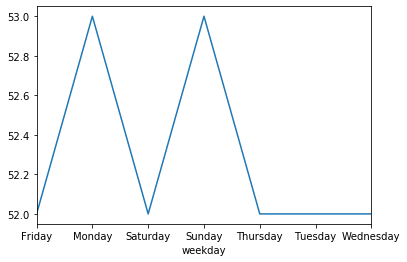

In [48]:
# plot weekday wise biker count for 'Berri1'
b=bikes_df.groupby('weekday')['Berri1'].count()
b.plot()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)